In [1]:
#import libraries

import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
#load data

polls = pd.read_csv("polls_btw.csv", index_col='date', parse_dates=True)
polls.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
1951-04-15,1953.0,NaN,allensbach,oth,24.0,1953-09-06,875.0
1950-11-15,1953.0,NaN,allensbach,gru,NaN,1953-09-06,1026.0
1952-12-15,1953.0,NaN,allensbach,spd,35.0,1953-09-06,265.0
1953-02-15,1953.0,NaN,allensbach,spd,33.0,1953-09-06,203.0
1951-03-15,1953.0,NaN,allensbach,gru,NaN,1953-09-06,906.0


## Exploratory Data Analysis

In [3]:
#Impute sample_size with 1000 for missing values

polls["sample_size"].fillna(1000, inplace=True)
polls.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
1951-04-15,1953.0,1000.0,allensbach,oth,24.0,1953-09-06,875.0
1950-11-15,1953.0,1000.0,allensbach,gru,NaN,1953-09-06,1026.0
1952-12-15,1953.0,1000.0,allensbach,spd,35.0,1953-09-06,265.0
1953-02-15,1953.0,1000.0,allensbach,spd,33.0,1953-09-06,203.0
1951-03-15,1953.0,1000.0,allensbach,gru,NaN,1953-09-06,906.0


In [4]:
#see how many unique polling institutions there are

polls['institute'].unique()

array(['allensbach', 'fgruppe_wahlen', 'forsa', 'emnid',
       'infratest_dimap', 'gms', 'insa'], dtype=object)

In [5]:
#see how many unique parties there are in the polls

polls['party'].unique()

array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)

In [6]:
#create data frame with polls from each institutions in 2017 

election2017_allen = polls.loc[(polls['institute'] == 'allensbach') & (polls['election'] == 2017)]
election2017_insa = polls.loc[(polls['institute'] == 'insa') & (polls['election'] == 2017)]
election2017_forsa = polls.loc[(polls['institute'] == 'forsa') & (polls['election'] == 2017)]
election2017_emnid = polls.loc[(polls['institute'] == 'emnid') & (polls['election'] == 2017)]
election2017_gms = polls.loc[(polls['institute'] == 'gms') & (polls['election'] == 2017)]
election2017_infra = polls.loc[(polls['institute'] == 'infratest_dimap') & (polls['election'] == 2017)]
election2017_fgruppe = polls.loc[(polls['institute'] == 'fgruppe_wahlen') & (polls['election'] == 2017)]

In [7]:
#check out institution allensbach: 

election2017_allen.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
2015-06-18,2017.0,1400.0,allensbach,spd,26.0,2017-09-24,829.0
2016-08-24,2017.0,1496.0,allensbach,spd,23.0,2017-09-24,396.0
2015-08-19,2017.0,1400.0,allensbach,spd,26.0,2017-09-24,767.0
2015-02-19,2017.0,1400.0,allensbach,spd,25.5,2017-09-24,948.0
2017-07-18,2017.0,1403.0,allensbach,spd,25.0,2017-09-24,68.0


In [8]:
type(election2017_allen)

pandas.core.frame.DataFrame

In [9]:
#create allensbach's polls for AFD in 2017 election:

election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
#plot_allen_afd = sns.lineplot(x="days_to_election", y="support", data=election2017allen_afd)

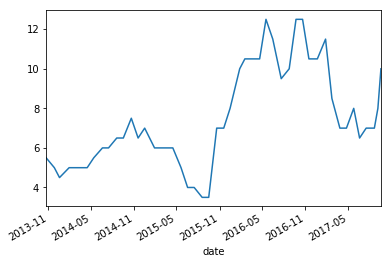

In [10]:
#plot allensbach's polls for AFD in 2017 election:
#election2017allen_afd['date'] = election2017allen_afd.index
#melted_df = pd.melt(election2017allen_afd, id_vars='date', value_name='support')
#plot_allen_afd = sns.tsplot(melted_df, time='date', value='support')
election2017_allen_afd.support['2013-10-23':'2017-09-19'].plot()
plt.show()
plt.clf()

In [11]:
upsampled_election2017_allen_afd = election2017_allen_afd['support'].resample('D').first()

In [12]:
print(upsampled_election2017_allen_afd.head(32))

date
2013-10-23    5.5
2013-10-24    NaN
2013-10-25    NaN
2013-10-26    NaN
2013-10-27    NaN
2013-10-28    NaN
2013-10-29    NaN
2013-10-30    NaN
2013-10-31    NaN
2013-11-01    NaN
2013-11-02    NaN
2013-11-03    NaN
2013-11-04    NaN
2013-11-05    NaN
2013-11-06    NaN
2013-11-07    NaN
2013-11-08    NaN
2013-11-09    NaN
2013-11-10    NaN
2013-11-11    NaN
2013-11-12    NaN
2013-11-13    NaN
2013-11-14    NaN
2013-11-15    NaN
2013-11-16    NaN
2013-11-17    NaN
2013-11-18    NaN
2013-11-19    NaN
2013-11-20    NaN
2013-11-21    NaN
2013-11-22    NaN
2013-11-23    NaN
Freq: D, Name: support, dtype: float64


In [13]:
interpolated_election2017_allen_afd = upsampled_election2017_allen_afd.interpolate(how='linear')
interpolated_election2017_allen_afd.head()

date
2013-10-23    5.500000
2013-10-24    5.485714
2013-10-25    5.471429
2013-10-26    5.457143
2013-10-27    5.442857
Freq: D, Name: support, dtype: float64

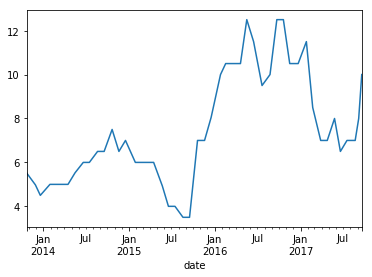

In [14]:
interpolated_election2017_allen_afd.plot()
plt.show()
plt.clf()

## Data transformation of time-series 



#### AFD

In [15]:
#Create dataframe for AFD voteshares polls by each of the 7 institutions

election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
election2017_insa_afd = election2017_insa.loc[election2017_insa['party'] == 'afd']
election2017_forsa_afd = election2017_forsa.loc[election2017_forsa['party'] == 'afd']
election2017_emnid_afd = election2017_emnid.loc[election2017_emnid['party'] == 'afd']
election2017_gms_afd = election2017_gms.loc[election2017_gms['party'] == 'afd']
election2017_infra_afd = election2017_infra.loc[election2017_infra['party'] == 'afd']
election2017_fgruppe_afd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'afd']

In [16]:
#Create upsampled and interpolated data for Allen in AFD voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_allen = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_allen_afd = election2017_allen_afd['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_afd = upsampled_election2017_allen_afd.interpolate(how='linear')
interpolated_election2017_allen_afd = interpolated_election2017_allen_afd.reindex(t_index_final)
interpolated_election2017_allen_afd.tail()

2017-09-17     9.692308
2017-09-18     9.846154
2017-09-19    10.000000
2017-09-20    10.000000
2017-09-21    10.000000
Freq: D, Name: support, dtype: float64

In [171]:
#Create upsampled and interpolated data for Insa in AFD voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_insa_afd = election2017_insa_afd['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_afd = upsampled_election2017_insa_afd.interpolate(how='linear')
interpolated_election2017_insa_afd = interpolated_election2017_insa_afd.reindex(t_index_final)
interpolated_election2017_insa_afd.tail()

2017-09-17    11.0
2017-09-18    11.0
2017-09-19    11.0
2017-09-20    11.0
2017-09-21    11.0
Freq: D, Name: support, dtype: float64

In [18]:
#Create upsampled and interpolated data for Forsa in AFD voteshares

t_index_forsa = pd.date_range(start='2013-10-01', end='2017-09-21', freq='D')

upsampled_election2017_forsa_afd = election2017_forsa_afd['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_afd = upsampled_election2017_forsa_afd.interpolate(how='linear')
interpolated_election2017_forsa_afd = interpolated_election2017_forsa_afd.reindex(t_index_final)
interpolated_election2017_forsa_afd.tail()

2017-09-17    9.0
2017-09-18    9.0
2017-09-19    9.0
2017-09-20    9.0
2017-09-21    9.0
Freq: D, Name: support, dtype: float64

In [19]:
#Create upsampled and interpolated data for Emnid in AFD voteshares

t_index_emnid = pd.date_range(start='2013-09-29', end='2017-09-21', freq='D')

upsampled_election2017_emnid_afd = election2017_emnid_afd['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_afd = upsampled_election2017_emnid_afd.interpolate(how='linear')
interpolated_election2017_emnid_afd = interpolated_election2017_emnid_afd.reindex(t_index_final)
interpolated_election2017_emnid_afd.tail()

2017-09-17    11.0
2017-09-18    11.0
2017-09-19    11.0
2017-09-20    11.0
2017-09-21    11.0
Freq: D, Name: support, dtype: float64

In [20]:
#Create upsampled and interpolated data for GMS in AFD voteshares

t_index_gms = pd.date_range(start='2013-10-15', end='2017-09-21', freq='D')

upsampled_election2017_gms_afd = election2017_gms_afd['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_afd = upsampled_election2017_gms_afd.interpolate(how='linear')
interpolated_election2017_gms_afd = interpolated_election2017_gms_afd.reindex(t_index_final)
interpolated_election2017_gms_afd.tail()

2017-09-17     9.428571
2017-09-18     9.571429
2017-09-19     9.714286
2017-09-20     9.857143
2017-09-21    10.000000
Freq: D, Name: support, dtype: float64

In [21]:
#Create upsampled and interpolated data for Infra in AFD voteshares

t_index_infra = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_infra_afd = election2017_infra_afd['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_afd = upsampled_election2017_infra_afd.interpolate(how='linear')
interpolated_election2017_infra_afd = interpolated_election2017_infra_afd.reindex(t_index_final)
interpolated_election2017_gms_afd.tail()

2017-09-17     9.428571
2017-09-18     9.571429
2017-09-19     9.714286
2017-09-20     9.857143
2017-09-21    10.000000
Freq: D, Name: support, dtype: float64

In [169]:
#Create upsampled and interpolated data for Fgruppe in AFD voteshares

t_index_fgruppe = pd.date_range(start='2013-09-27', end='2017-09-21', freq='D')

upsampled_election2017_fgruppe_afd = election2017_fgruppe_afd['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_afd = upsampled_election2017_fgruppe_afd.interpolate(how='linear')
interpolated_election2017_fgruppe_afd = interpolated_election2017_fgruppe_afd.reindex(t_index_final)
interpolated_election2017_fgruppe_afd.tail()

2017-09-17    10.333333
2017-09-18    10.500000
2017-09-19    10.666667
2017-09-20    10.833333
2017-09-21    11.000000
Freq: D, Name: support, dtype: float64

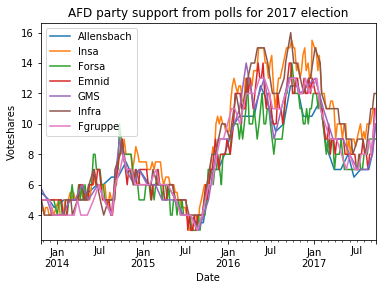

In [269]:
interpolated_election2017_allen_afd.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_afd.plot(label="Insa", legend = True)
interpolated_election2017_forsa_afd.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_afd.plot(label="Emnid", legend = True)
interpolated_election2017_gms_afd.plot(label="GMS", legend = True)
interpolated_election2017_infra_afd.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_afd.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("AFD party support from polls for 2017 election")
plt.show()
plt.clf()

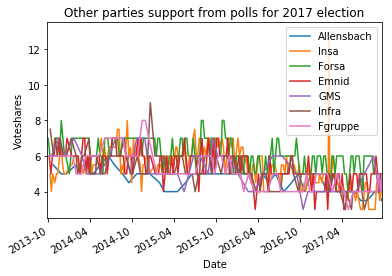

In [270]:
#array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)

election2017_allen_oth = election2017_allen.loc[election2017_allen['party'] == 'oth']
election2017_insa_oth = election2017_insa.loc[election2017_insa['party'] == 'oth']
election2017_forsa_oth = election2017_forsa.loc[election2017_forsa['party'] == 'oth']
election2017_emnid_oth = election2017_emnid.loc[election2017_emnid['party'] == 'oth']
election2017_gms_oth = election2017_gms.loc[election2017_gms['party'] == 'oth']
election2017_infra_oth = election2017_infra.loc[election2017_infra['party'] == 'oth']
election2017_fgruppe_oth = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'oth']

election2017_allen_oth['support'].plot(label="Allensbach", legend = True)
election2017_insa_oth['support'].plot(label="Insa", legend = True)
election2017_forsa_oth['support'].plot(label="Forsa", legend = True)
election2017_emnid_oth['support'].plot(label="Emnid", legend = True)
election2017_gms_oth['support'].plot(label="GMS", legend = True)
election2017_infra_oth['support'].plot(label="Infra", legend = True)
election2017_fgruppe_oth['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Other parties support from polls for 2017 election")
plt.show()
plt.clf()

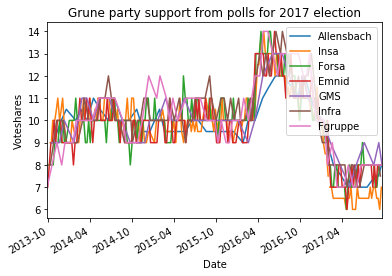

In [271]:
election2017_allen_gru = election2017_allen.loc[election2017_allen['party'] == 'gru']
election2017_insa_gru = election2017_insa.loc[election2017_insa['party'] == 'gru']
election2017_forsa_gru = election2017_forsa.loc[election2017_forsa['party'] == 'gru']
election2017_emnid_gru = election2017_emnid.loc[election2017_emnid['party'] == 'gru']
election2017_gms_gru = election2017_gms.loc[election2017_gms['party'] == 'gru']
election2017_infra_gru = election2017_infra.loc[election2017_infra['party'] == 'gru']
election2017_fgruppe_gru = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'gru']

election2017_allen_gru['support'].plot(label="Allensbach", legend = True)
election2017_insa_gru['support'].plot(label="Insa", legend = True)
election2017_forsa_gru['support'].plot(label="Forsa", legend = True)
election2017_emnid_gru['support'].plot(label="Emnid", legend = True)
election2017_gms_gru['support'].plot(label="GMS", legend = True)
election2017_infra_gru['support'].plot(label="Infra", legend = True)
election2017_fgruppe_gru['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Grune party support from polls for 2017 election")
plt.show()
plt.clf()

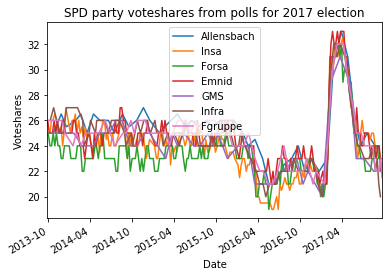

In [268]:
election2017_allen_spd = election2017_allen.loc[election2017_allen['party'] == 'spd']
election2017_insa_spd = election2017_insa.loc[election2017_insa['party'] == 'spd']
election2017_forsa_spd = election2017_forsa.loc[election2017_forsa['party'] == 'spd']
election2017_emnid_spd = election2017_emnid.loc[election2017_emnid['party'] == 'spd']
election2017_gms_spd = election2017_gms.loc[election2017_gms['party'] == 'spd']
election2017_infra_spd = election2017_infra.loc[election2017_infra['party'] == 'spd']
election2017_fgruppe_spd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'spd']

election2017_allen_spd['support'].plot(label="Allensbach", legend = True)
election2017_insa_spd['support'].plot(label="Insa", legend = True)
election2017_forsa_spd['support'].plot(label="Forsa", legend = True)
election2017_emnid_spd['support'].plot(label="Emnid", legend = True)
election2017_gms_spd['support'].plot(label="GMS", legend = True)
election2017_infra_spd['support'].plot(label="Infra", legend = True)
election2017_fgruppe_spd['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("SPD party support from polls for 2017 election")
plt.show()
plt.clf()

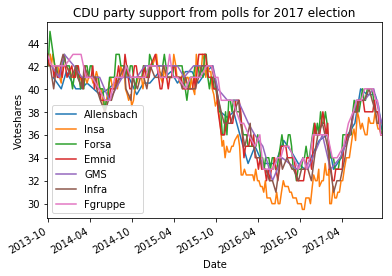

In [272]:
election2017_allen_cdu = election2017_allen.loc[election2017_allen['party'] == 'cdu']
election2017_insa_cdu = election2017_insa.loc[election2017_insa['party'] == 'cdu']
election2017_forsa_cdu = election2017_forsa.loc[election2017_forsa['party'] == 'cdu']
election2017_emnid_cdu = election2017_emnid.loc[election2017_emnid['party'] == 'cdu']
election2017_gms_cdu = election2017_gms.loc[election2017_gms['party'] == 'cdu']
election2017_infra_cdu = election2017_infra.loc[election2017_infra['party'] == 'cdu']
election2017_fgruppe_cdu = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'cdu']

election2017_allen_cdu['support'].plot(label="Allensbach", legend = True)
election2017_insa_cdu['support'].plot(label="Insa", legend = True)
election2017_forsa_cdu['support'].plot(label="Forsa", legend = True)
election2017_emnid_cdu['support'].plot(label="Emnid", legend = True)
election2017_gms_cdu['support'].plot(label="GMS", legend = True)
election2017_infra_cdu['support'].plot(label="Infra", legend = True)
election2017_fgruppe_cdu['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("CDU party support from polls for 2017 election")
plt.show()
plt.clf()

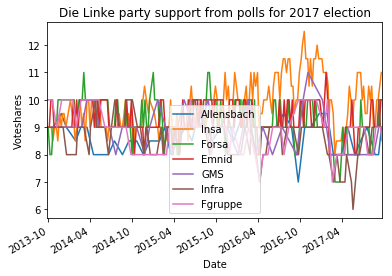

In [273]:
election2017_allen_lin = election2017_allen.loc[election2017_allen['party'] == 'lin']
election2017_insa_lin = election2017_insa.loc[election2017_insa['party'] == 'lin']
election2017_forsa_lin = election2017_forsa.loc[election2017_forsa['party'] == 'lin']
election2017_emnid_lin = election2017_emnid.loc[election2017_emnid['party'] == 'lin']
election2017_gms_lin = election2017_gms.loc[election2017_gms['party'] == 'lin']
election2017_infra_lin = election2017_infra.loc[election2017_infra['party'] == 'lin']
election2017_fgruppe_lin = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'lin']

election2017_allen_lin['support'].plot(label="Allensbach", legend = True)
election2017_insa_lin['support'].plot(label="Insa", legend = True)
election2017_forsa_lin['support'].plot(label="Forsa", legend = True)
election2017_emnid_lin['support'].plot(label="Emnid", legend = True)
election2017_gms_lin['support'].plot(label="GMS", legend = True)
election2017_infra_lin['support'].plot(label="Infra", legend = True)
election2017_fgruppe_lin['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Die Linke party support from polls for 2017 election")
plt.show()
plt.clf()

In [ ]:
election2017_allen_fdp = election2017_allen.loc[election2017_allen['party'] == 'lin']
election2017_insa_fdp = election2017_insa.loc[election2017_insa['party'] == 'lin']
election2017_forsa_lin = election2017_forsa.loc[election2017_forsa['party'] == 'lin']
election2017_emnid_lin = election2017_emnid.loc[election2017_emnid['party'] == 'lin']
election2017_gms_lin = election2017_gms.loc[election2017_gms['party'] == 'lin']
election2017_infra_lin = election2017_infra.loc[election2017_infra['party'] == 'lin']
election2017_fgruppe_lin = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'lin']

election2017_allen_lin['support'].plot(label="Allensbach", legend = True)
election2017_insa_lin['support'].plot(label="Insa", legend = True)
election2017_forsa_lin['support'].plot(label="Forsa", legend = True)
election2017_emnid_lin['support'].plot(label="Emnid", legend = True)
election2017_gms_lin['support'].plot(label="GMS", legend = True)
election2017_infra_lin['support'].plot(label="Infra", legend = True)
election2017_fgruppe_lin['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Die Linke party support from polls for 2017 election")
plt.show()
plt.clf()

In [24]:
#Create new dataframe with all new time-series from 7 institutions

frames_afd = [interpolated_election2017_allen_afd, interpolated_election2017_insa_afd, 
         interpolated_election2017_forsa_afd, interpolated_election2017_emnid_afd,
         interpolated_election2017_gms_afd, interpolated_election2017_infra_afd, 
         interpolated_election2017_fgruppe_afd]

result_afd = pd.concat(frames_afd, axis=1)
final_result_afd = result_afd.T
final_result_afd.head()

,2013-10-23 00:00:00,2013-10-24 00:00:00,2013-10-25 00:00:00,2013-10-26 00:00:00,2013-10-27 00:00:00,2013-10-28 00:00:00,2013-10-29 00:00:00,2013-10-30 00:00:00,2013-10-31 00:00:00,2013-11-01 00:00:00,...,2017-09-12 00:00:00,2017-09-13 00:00:00,2017-09-14 00:00:00,2017-09-15 00:00:00,2017-09-16 00:00:00,2017-09-17 00:00:00,2017-09-18 00:00:00,2017-09-19 00:00:00,2017-09-20 00:00:00,2017-09-21 00:00:00
support,5.500000,5.485714,5.471429,5.457143,5.442857,5.428571,5.414286,5.400000,5.385714,5.371429,...,8.923077,9.076923,9.230769,9.384615,9.538462,9.692308,9.846154,10.000000,10.000000,10.0
support,4.111111,4.166667,4.222222,4.277778,4.333333,4.388889,4.444444,4.500000,4.428571,4.357143,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
support,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
support,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,9.857143,10.142857,10.428571,10.714286,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
support,5.771429,5.742857,5.714286,5.685714,5.657143,5.628571,5.600000,5.571429,5.542857,5.514286,...,8.714286,8.857143,9.000000,9.142857,9.285714,9.428571,9.571429,9.714286,9.857143,10.0


## MODELLING FOR AFD

In [25]:
#import libraries 

import talib
import numpy as np
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor


##### Correlations
Correlations are nice to check out before building machine learning models, because we can see which features correlate to the target most strongly. Pearson's correlation coefficient is often used, which only detects linear relationships. It's commonly assumed our data is normally distributed, which we can "eyeball" from histograms. Highly correlated variables have a Pearson correlation coefficient near 1 (positively correlated) or -1 (negatively correlated). A value near 0 means the two variables are not linearly correlated.

If we use the same time periods for previous voteshares changes and future voteshares changes, we can see if the vote share is mean-reverting (bounces around) or trend-following (goes up if it has been going up recently).

In [209]:
#Create dataframe from interpolated allensbach data for AFD

df_2017_allen_afd = interpolated_election2017_allen_afd.to_frame()
df_2017_allen_afd.tail()

,support
2017-09-17,9.692308
2017-09-18,9.846154
2017-09-19,10.000000
2017-09-20,10.000000
2017-09-21,10.000000


In [210]:
# Create 3-day % changes of support for the current day, and 3 days in the future

df_2017_allen_afd['3d_future'] = df_2017_allen_afd['support'].shift(-3)
df_2017_allen_afd['3d_future_pct'] = df_2017_allen_afd['3d_future'].pct_change(3)
df_2017_allen_afd['3d_pct'] = df_2017_allen_afd['support'].pct_change(3)

In [211]:
#look at the new dataframe

df_2017_allen_afd.head(10)

,support,3d_future,3d_future_pct,3d_pct
2013-10-23,5.500000,5.457143,NaN,NaN
2013-10-24,5.485714,5.442857,NaN,NaN
2013-10-25,5.471429,5.428571,NaN,NaN
2013-10-26,5.457143,5.414286,-0.007853,-0.007792
2013-10-27,5.442857,5.400000,-0.007874,-0.007812
2013-10-28,5.428571,5.385714,-0.007895,-0.007833
2013-10-29,5.414286,5.371429,-0.007916,-0.007853
2013-10-30,5.400000,5.357143,-0.007937,-0.007874
2013-10-31,5.385714,5.342857,-0.007958,-0.007895
2013-11-01,5.371429,5.328571,-0.007979,-0.007916


In [212]:
# Calculate the correlation matrix between the 3d close pecentage changes (current and future)

corr = df_2017_allen_afd[['3d_pct', '3d_future_pct']].corr()
print(corr)

                 3d_pct  3d_future_pct
3d_pct         1.000000       0.923151
3d_future_pct  0.923151       1.000000


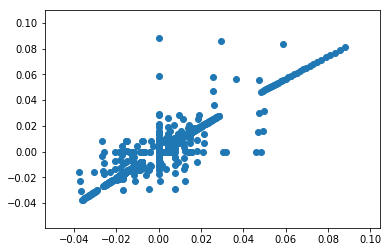

In [213]:
# Scatter the current 3-day percent change vs the future 3-day percent change
plt.scatter(df_2017_allen_afd['3d_pct'], df_2017_allen_afd['3d_future_pct'])
plt.show()

#### Create moving average

We want to add historical data to our machine learning models to make better predictions, but adding lots of historical time steps is tricky. Instead, we can condense information from previous points into a single timestep with indicators.

A moving average is one of the simplest indicators - it's the average of previous data points. This is the function talib.SMA() from the TAlib library.

In [214]:
feature_names = ['3d_future']  # a list of the feature names for later

# Create moving averages timeperiods of 3, 5, 10, 20, 30, 50, 100 and 200
for n in [3, 5, 10, 20, 30, 50, 100, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_2017_allen_afd['ma' + str(n)] = talib.SMA(df_2017_allen_afd['support'].values,
                              timeperiod=n) / df_2017_allen_afd['support']
    # Create the RSI indicator
    #df_2017_allen_afd['rsi' + str(n)] = talib.RSI(df_2017_allen_afd['support'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n)]
print(feature_names)

['3d_future', 'ma3', 'ma5', 'ma10', 'ma20', 'ma30', 'ma50', 'ma100', 'ma200']


In [215]:
df_2017_allen_afd.head(20)

,support,3d_future,3d_future_pct,3d_pct,ma3,ma5,ma10,ma20,ma30,ma50,ma100,ma200
2013-10-23,5.500000,5.457143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-24,5.485714,5.442857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-25,5.471429,5.428571,NaN,NaN,1.002611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-26,5.457143,5.414286,-0.007853,-0.007792,1.002618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-27,5.442857,5.400000,-0.007874,-0.007812,1.002625,1.005249,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-28,5.428571,5.385714,-0.007895,-0.007833,1.002632,1.005263,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-29,5.414286,5.371429,-0.007916,-0.007853,1.002639,1.005277,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-30,5.400000,5.357143,-0.007937,-0.007874,1.002646,1.005291,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-31,5.385714,5.342857,-0.007958,-0.007895,1.002653,1.005305,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-01,5.371429,5.328571,-0.007979,-0.007916,1.002660,1.005319,1.011968,NaN,NaN,NaN,NaN,NaN


In [216]:
df_2017_allen_afd = df_2017_allen_afd.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = df_2017_allen_afd[feature_names]
targets = df_2017_allen_afd['3d_future_pct']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['3d_future_pct'] + feature_names
feat_targ_df = df_2017_allen_afd[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

               3d_future_pct  3d_future       ma3       ma5      ma10  \
3d_future_pct       1.000000   0.010718 -0.942369 -0.930175 -0.896611   
3d_future           0.010718   1.000000 -0.046979 -0.056604 -0.079524   
ma3                -0.942369  -0.046979  1.000000  0.994403  0.967001   
ma5                -0.930175  -0.056604  0.994403  1.000000  0.984826   
ma10               -0.896611  -0.079524  0.967001  0.984826  1.000000   
ma20               -0.827028  -0.121077  0.902962  0.927801  0.970825   
ma30               -0.752974  -0.157662  0.833167  0.860684  0.915457   
ma50               -0.624141  -0.218267  0.701935  0.729511  0.790111   
ma100              -0.449299  -0.326635  0.513022  0.535717  0.587977   
ma200              -0.313555  -0.482655  0.369658  0.388982  0.434164   

                   ma20      ma30      ma50     ma100     ma200  
3d_future_pct -0.827028 -0.752974 -0.624141 -0.449299 -0.313555  
3d_future     -0.121077 -0.157662 -0.218267 -0.326635 -0.482655 

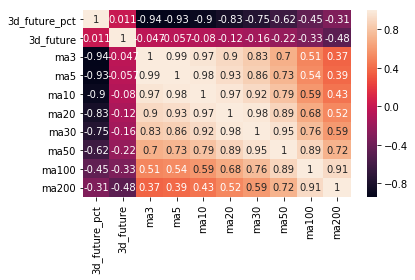

In [217]:
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

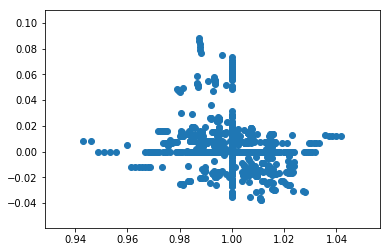

In [218]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(df_2017_insa_afd['ma3'], df_2017_allen_afd['3d_future_pct'])
plt.show()

#### Linear Model 

##### Create training and test features

In [219]:

# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(1228, 10) (1043, 10) (185, 10)


/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [221]:
# Create the linear model and complete the least squares fit
model_allen_afd = sm.OLS(train_targets, train_features)
results_allen_afd = model_allen_afd.fit()  # fit the model
print(results_allen_afd.summary())

                            OLS Regression Results                            
Dep. Variable:          3d_future_pct   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1034.
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:28:52   Log-Likelihood:                 3995.2
No. Observations:                1043   AIC:                            -7970.
Df Residuals:                    1033   BIC:                            -7921.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7557      0.159     23.571      0.0

In [222]:
# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results_allen_afd.pvalues)


const        1.208666e-98
3d_future    1.045518e-01
ma3          4.440566e-30
ma5          1.065709e-03
ma10         7.986494e-01
ma20         1.800857e-01
ma30         1.511335e-01
ma50         8.818265e-01
ma100        3.183089e-01
ma200        3.482181e-01
dtype: float64


In [223]:
# Make predictions from our model for train and test sets
train_predictions = results_allen_afd.predict(train_features)
test_predictions = results_allen_afd.predict(test_features)
print(test_predictions)

2017-03-18   -0.016455
2017-03-19   -0.016660
2017-03-20   -0.016843
2017-03-21   -0.017005
2017-03-22   -0.017144
2017-03-23   -0.017261
2017-03-24   -0.017354
2017-03-25   -0.017449
2017-03-26   -0.017552
2017-03-27   -0.017655
2017-03-28   -0.017761
2017-03-29   -0.002819
2017-03-30    0.003393
2017-03-31    0.000876
2017-04-01   -0.000247
2017-04-02    0.000025
2017-04-03    0.000255
2017-04-04    0.000443
2017-04-05    0.000589
2017-04-06    0.000693
2017-04-07    0.000755
2017-04-08    0.000798
2017-04-09    0.000821
2017-04-10    0.000823
2017-04-11    0.000807
2017-04-12    0.000770
2017-04-13    0.000714
2017-04-14    0.000638
2017-04-15    0.000544
2017-04-16    0.000430
                ...   
2017-08-20    0.000377
2017-08-21    0.000365
2017-08-22    0.000354
2017-08-23    0.022697
2017-08-24    0.031679
2017-08-25    0.027672
2017-08-26    0.025768
2017-08-27    0.025911
2017-08-28    0.025991
2017-08-29    0.026012
2017-08-30    0.025974
2017-08-31    0.025879
2017-09-01 

#### Evaluate Linear Model Results

Once we have our linear fit and predictions, we want to see how good the predictions are so we can decide if our model is any good or not. 

A quick way to understand the performance of our model is looking at regression evaluation metrics like R2, and plotting the predictions versus the actual values of the targets. Perfect predictions would form a straight, diagonal line in such a plot, making it easy for us to eyeball how our predictions are doing in different regions of voteshare changes.

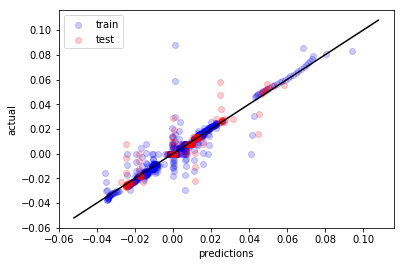

In [224]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha = 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

#### Decision Tree Model

In [225]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_allen_afd = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree_allen_afd.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree_allen_afd.score(train_features, train_targets))
print(decision_tree_allen_afd.score(test_features, test_targets))

0.9998987729341396
0.7322337894522877


As expected, perfect fit on the training data but quite a bad fit on the test data. Let's see if we can improve by experimenting on the max height of the trees. 

In [227]:
# Loop through a few different max depths and check the performance
for d in [3, 5, 10, 15, 20, 25]:
    # Create the tree and fit it
    decision_tree_allen_afd = DecisionTreeRegressor(max_depth=d)
    decision_tree_allen_afd.fit(train_features, train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_allen_afd.score(train_features, train_targets))
    print(decision_tree_allen_afd.score(test_features, test_targets), '\n')

max_depth= 3
0.8881933722044721
0.78557570023376 

max_depth= 5
0.9257244949427467
0.7460030933680579 

max_depth= 10
0.9959139647271333
0.7658854690178207 

max_depth= 15
0.9997508045939772
0.7179759025516324 

max_depth= 20
0.9998987729341396
0.4681848666852052 

max_depth= 25
0.9998987729341396
0.5822739657277125 



It seems that trees of max height 3 would be the best at predicting the changes in voteshares percentage during the next 5 days. 

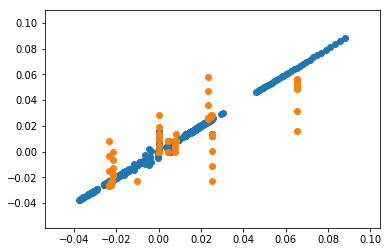

In [228]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree_allen_afd = DecisionTreeRegressor(max_depth=10)
decision_tree_allen_afd.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree_allen_afd.predict(train_features)
test_predictions = decision_tree_allen_afd.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label = 'test')
plt.show()

#### Random Forest Model 

In [233]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr_allen_afd = RandomForestRegressor(n_estimators=200)
rfr_allen_afd.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr_allen_afd.score(train_features, train_targets))
print(rfr_allen_afd.score(test_features, test_targets))

0.9944044470721668
0.8086348160142691


Let's see if we can improve on the score with hyperparameter tuning: 

In [234]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr_allen_afd.set_params(**g)  # ** is "unpacking" the dictionary
    rfr_allen_afd.fit(train_features, train_targets)
    test_scores.append(rfr_allen_afd.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.7717386136304498 {'random_state': 42, 'n_estimators': 200, 'max_features': 8, 'max_depth': 3}


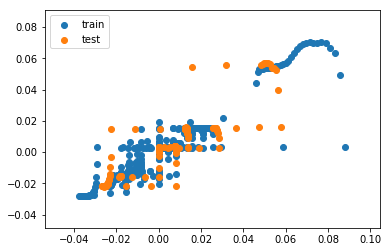

In [235]:
# Use the best hyperparameters from before to fit a random forest model
rfr_allen_afd = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr_allen_afd.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr_allen_afd.predict(train_features)
test_predictions = rfr_allen_afd.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

In [236]:
print(test_predictions)

[-1.54564240e-02 -1.55534054e-02 -1.56111272e-02 -1.55024446e-02
 -1.55024446e-02 -1.58813754e-02 -1.60065079e-02 -1.60595134e-02
 -1.61025717e-02 -1.61549207e-02 -1.62045286e-02 -1.03485107e-02
 -2.51840736e-03 -1.96985223e-04  2.14790247e-04  3.82370921e-04
  1.42504318e-03  1.90575917e-03  1.90575917e-03  1.93600553e-03
  2.01367247e-03  2.01367247e-03  2.08356422e-03  2.08356422e-03
  2.10320805e-03  2.24535525e-03  2.33476427e-03  2.35418057e-03
  2.35418057e-03  2.35418057e-03  2.35418057e-03  2.36314741e-03
  2.37544251e-03  2.37544251e-03  2.40498380e-03  2.39559942e-03
  2.42229134e-03  2.43537785e-03  2.48106757e-03  3.47463856e-03
  8.96899969e-03  1.08334110e-02  1.20144006e-02  1.22131981e-02
  1.24397693e-02  1.37649532e-02  1.44935787e-02  1.46383269e-02
  1.48641675e-02  1.51429943e-02  1.53281610e-02  1.53497108e-02
  1.56333719e-02  1.56333719e-02  1.57301753e-02  1.54111957e-02
  1.54111957e-02  1.54111957e-02  1.54111957e-02  1.54111957e-02
  1.54111957e-02  1.49588

In [237]:
print(test_targets)

2017-03-18   -0.017787
2017-03-19   -0.017893
2017-03-20   -0.018000
2017-03-21   -0.018109
2017-03-22   -0.018219
2017-03-23   -0.018330
2017-03-24   -0.018443
2017-03-25   -0.018557
2017-03-26   -0.012448
2017-03-27   -0.006263
2017-03-28    0.000000
2017-03-29    0.000000
2017-03-30    0.000000
2017-03-31    0.000000
2017-04-01    0.000000
2017-04-02    0.000000
2017-04-03    0.000000
2017-04-04    0.000000
2017-04-05    0.000000
2017-04-06    0.000000
2017-04-07    0.000000
2017-04-08    0.000000
2017-04-09    0.000000
2017-04-10    0.000000
2017-04-11    0.000000
2017-04-12    0.000000
2017-04-13    0.000000
2017-04-14    0.000000
2017-04-15    0.000000
2017-04-16    0.000000
                ...   
2017-08-20    0.009524
2017-08-21    0.019048
2017-08-22    0.028571
2017-08-23    0.028302
2017-08-24    0.028037
2017-08-25    0.027778
2017-08-26    0.027523
2017-08-27    0.027273
2017-08-28    0.027027
2017-08-29    0.026786
2017-08-30    0.026549
2017-08-31    0.026316
2017-09-01 

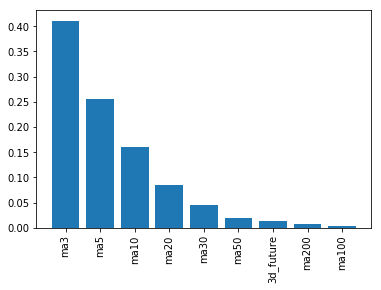

In [238]:
# Get feature importances from our random forest model
importances = rfr_allen_afd.feature_importances_
importances = importances[importances != 0]

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [263]:
# Gradient Boosting Model 
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr_allen_afd = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
result_gbr = gbr_allen_afd.fit(train_features, train_targets)

print(gbr_allen_afd.score(train_features, train_targets))
print(gbr_allen_afd.score(test_features, test_targets))

0.892791089461975
0.8070740171628102


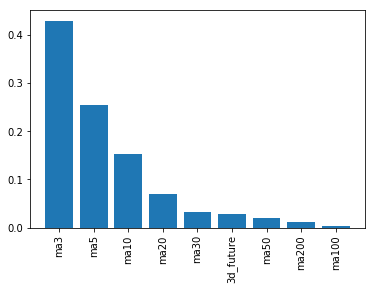

In [241]:
# Extract feature importances from the fitted gradient boosting model
feature_importances_gbr = gbr_allen_afd.feature_importances_
feature_importances_gbr = feature_importances_gbr[feature_importances_gbr != 0]

# Get the indices of the largest to smallest feature importances
sorted_index_gbr = np.argsort(feature_importances_gbr)[::-1]
x_gbr = range(features.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index_gbr]

plt.bar(x_gbr, feature_importances_gbr[sorted_index_gbr], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

In [261]:
# XGBoost Model
from xgboost import XGBRegressor

# Create the xgboost model and fit to the training data

xgb_model_allen_afd = XGBRegressor()
result_xgb = xgb_model_allen_afd.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(xgb_model_allen_afd.score(train_features, train_targets))
print(xgb_model_allen_afd.score(test_features, test_targets))

0.9708126058153611
0.860819727747812


/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [114]:
test_predictions_xgb_model_allen_afd = xgb_model_allen_afd.predict(test_features)
print(test_predictions_xgb_model_allen_afd)

[-0.02804512 -0.02804512 -0.02804512 -0.02896339 -0.02896339 -0.02443606
 -0.02443606 -0.02443606 -0.02443606 -0.02443606 -0.02443606 -0.02443606
 -0.0078817   0.00441298  0.00441298  0.00348938  0.00348938  0.00327992
  0.00327992  0.00327992  0.00327992  0.00327992  0.00327992  0.00327992
 -0.00124776 -0.00131536 -0.00131536 -0.00131536 -0.00131536 -0.00131536
 -0.00131536 -0.00245541 -0.00245541 -0.00245541 -0.00245541 -0.00342679
 -0.00329268 -0.00347829 -0.00347829 -0.00347829  0.02293184  0.03884751
  0.0385673   0.0385673   0.04132017  0.04223076  0.04223076  0.04212955
  0.04212955  0.04056269  0.04056269  0.04056269  0.04056269  0.04056269
  0.03999126  0.03999126  0.03999126  0.04029474  0.04029474  0.04029474
  0.04029474  0.04029474  0.04029474  0.04029474  0.03467295  0.03467295
  0.03467295  0.03467295  0.03467295  0.03467295  0.03467295 -0.01687765
 -0.04108137 -0.03961515 -0.03961515 -0.03930026 -0.0405755  -0.04169977
 -0.04159862 -0.04159862 -0.04159862 -0.04184324 -0

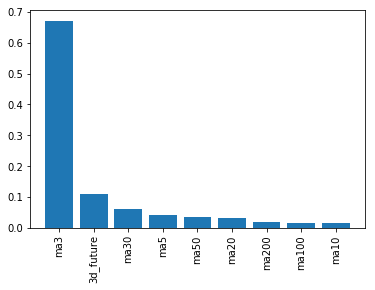

In [244]:
# Extract feature importances from the fitted gradient boosting model
feature_importances_xgb = xgb_model_allen_afd.feature_importances_
feature_importances_xgb = feature_importances_xgb[feature_importances_xgb != 0]

# Get the indices of the largest to smallest feature importances
sorted_index_xgb = np.argsort(feature_importances_xgb)[::-1]
x_xgb = range(features.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index_xgb]

plt.bar(x_xgb, feature_importances_xgb[sorted_index_xgb], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

In [255]:
# Deep Learning Model

#import libraries 
import tensorflow as tf
from tensorflow import keras

dnnmodel_allen_afd = tf.keras.Sequential()
dnnmodel_allen_afd.add(keras.layers.Dense(100, input_dim=train_features.shape[1], activation='relu'))
dnnmodel_allen_afd.add(keras.layers.Dense(20, activation='relu'))
dnnmodel_allen_afd.add(keras.layers.Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
dnnmodel_allen_afd.compile(optimizer='adam', loss='mean_squared_error')
history = dnnmodel_allen_afd.fit(train_features, train_targets, epochs=25)
print(dnnmodel_allen_afd.predict(test_features))

Train on 1043 samples
Epoch 1/25
1043/1043 [==============================] - 0s 178us/sample - loss: 0.0722
Epoch 2/25
1043/1043 [==============================] - 0s 64us/sample - loss: 0.0018
Epoch 3/25
1043/1043 [==============================] - 0s 105us/sample - loss: 5.7861e-04
Epoch 4/25
1043/1043 [==============================] - 0s 66us/sample - loss: 4.7978e-04
Epoch 5/25
1043/1043 [==============================] - 0s 49us/sample - loss: 4.2982e-04
Epoch 6/25
1043/1043 [==============================] - 0s 68us/sample - loss: 3.9867e-04
Epoch 7/25
1043/1043 [==============================] - 0s 177us/sample - loss: 3.8245e-04
Epoch 8/25
1043/1043 [==============================] - 0s 130us/sample - loss: 3.6612e-04
Epoch 9/25
1043/1043 [==============================] - 0s 121us/sample - loss: 3.6218e-04
Epoch 10/25
1043/1043 [==============================] - 0s 95us/sample - loss: 3.5319e-04
Epoch 11/25
1043/1043 [==============================] - 0s 76us/sample - loss: 

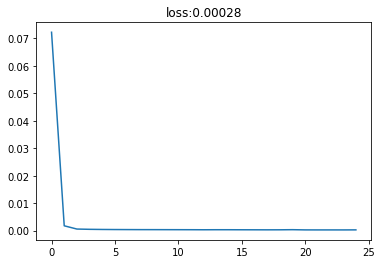

In [256]:
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [259]:
# Evaluate R^2 scores
from sklearn.metrics import mean_squared_error, r2_score

train_preds_dnn_allen_afd = dnnmodel_allen_afd.predict(train_features)
test_preds_dnn_allen_afd = dnnmodel_allen_afd.predict(test_features)
print(r2_score(train_targets, train_preds_dnn_allen_afd))
print(r2_score(test_targets, test_preds_dnn_allen_afd))

0.1084825883750129
-1.338070462160454


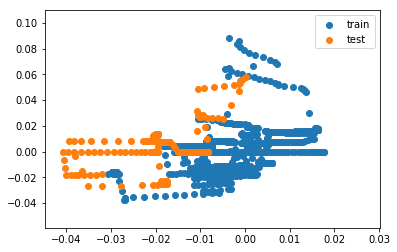

In [260]:
# Scatter the predictions vs actual
plt.scatter(train_preds_dnn_allen_afd, train_targets, label='train')
plt.scatter(test_preds_dnn_allen_afd, test_targets, label='test')  # plot test set
plt.legend(); plt.show()